In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import h5py

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
!ls

checkup.ipynb	      log_00000.log  profiling.json    vel_prof.txt
data_T_µ.dat.csv      log_00001.log  runExperiment.py
_korali_result_cmaes  model	     stress


In [3]:
!mir.avgh5 xz velocities /home/rio/Workspace/uq_force_field/DPD_water/stress/a2.20_gamma2.82_Ti2.000009[4-8].h5 | awk '{print $1}' > vel_prof.txt

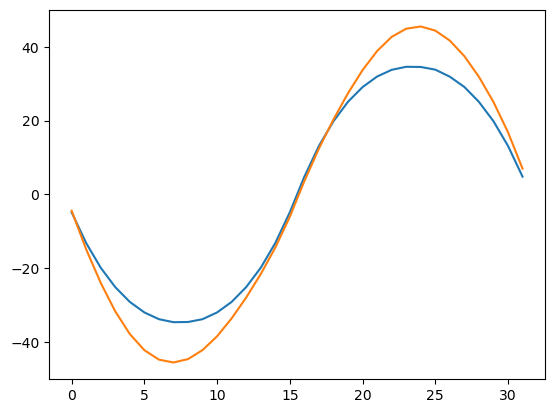

In [9]:
f0 = h5py.File("/home/rio/Workspace/uq_force_field/DPD_water/stress/a3.07_gamma2.04_Ti2.0000000.h5")

f1 = h5py.File("/home/rio/Workspace/uq_force_field/DPD_water/stress/a3.07_gamma2.04_Ti2.0000001.h5")

plt.plot(np.mean(f0['velocities'][:,:,:,0], axis=(0,2)))
plt.plot(np.mean(f1['velocities'][:,:,:,0], axis=(0,2)))